In [1]:
import polars as pl
import sys
sys.path.append('../..')

from configs.data_configs import PROCESSED_DATA_DIR
from components.feature_engineering import FeatureEngineering

taxi_zones = pl.read_parquet(PROCESSED_DATA_DIR / "taxi_zones/taxi_zones_with_centroids.parquet")
taxi_zones

OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,zone_centroid_lat,zone_centroid_long
i32,f64,f64,str,i32,str,f64,f64
1,0.116357,0.000782,"""Newark Airport""",1,"""EWR""",40.69183,-74.174001
2,0.43347,0.004866,"""Jamaica Bay""",2,"""Queens""",40.616746,-73.8313
3,0.084341,0.000314,"""Allerton/Pelham Gardens""",3,"""Bronx""",40.864473,-73.847422
4,0.043567,0.000112,"""Alphabet City""",4,"""Manhattan""",40.723752,-73.976968
5,0.092146,0.000498,"""Arden Heights""",5,"""Staten Island""",40.552659,-74.188485
…,…,…,…,…,…,…,…
259,0.12675,0.000395,"""Woodlawn/Wakefield""",259,"""Bronx""",40.897932,-73.852215
260,0.133514,0.000422,"""Woodside""",260,"""Queens""",40.744233,-73.906307
261,0.02712,0.000034,"""World Trade Center""",261,"""Manhattan""",40.709138,-74.013023


# plot ride and get ride length

In [2]:
import osmnx as ox
# Load the road network graph once
place = "New York City, New York, USA"
G = ox.graph_from_place(place, network_type='drive')
print("🌍 Graph loaded successfully.")

start_lat, start_long = taxi_zones.filter(taxi_zones['LocationID']==3)[['zone_centroid_lat', 'zone_centroid_long']].to_pandas().values[0]
end_lat, end_long = taxi_zones.filter(taxi_zones['LocationID']==4)[['zone_centroid_lat', 'zone_centroid_long']].to_pandas().values[0]

# Plot route
FeatureEngineering.plot_route_lat_lon(start_lat, start_long, end_lat, end_long, G, plot=True)

🌍 Graph loaded successfully.
🗺️ Map saved as 'ride_route.html'


21836.8595255962

In [3]:
# Load trip data
from configs.data_configs import RAW_DATA_DIR
import polars as pl
from utils.data_utils import Preprocess

# Example Usage Without Creating an Object
trips_df = pl.read_parquet(f"{RAW_DATA_DIR}/fhvhv_tripdata_2021-01.parquet").pipe(Preprocess.reduce_memory_usage)
print(trips_df.shape)
trips_df.head()

Memory usage before: 1700.79 MB
Memory usage after: 1155.66 MB
(11908468, 24)


hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
str,str,str,datetime[ns],datetime[ns],datetime[ns],datetime[ns],i32,i32,f32,i32,f32,f32,f32,f32,f32,f32,f32,f32,str,str,str,str,str
"""HV0003""","""B02682""","""B02682""",2021-01-01 00:28:09,2021-01-01 00:31:42,2021-01-01 00:33:44,2021-01-01 00:49:07,230,166,5.26,923,22.280001,0.0,0.67,1.98,2.75,null,0.0,14.99,"""N""","""N""",""" ""","""N""","""N"""
"""HV0003""","""B02682""","""B02682""",2021-01-01 00:45:56,2021-01-01 00:55:19,2021-01-01 00:55:19,2021-01-01 01:18:21,152,167,3.65,1382,18.360001,0.0,0.55,1.63,0.0,null,0.0,17.059999,"""N""","""N""",""" ""","""N""","""N"""
"""HV0003""","""B02764""","""B02764""",2021-01-01 00:21:15,2021-01-01 00:22:41,2021-01-01 00:23:56,2021-01-01 00:38:05,233,142,3.51,849,14.05,0.0,0.48,1.25,2.75,null,0.94,12.98,"""N""","""N""",""" ""","""N""","""N"""
"""HV0003""","""B02764""","""B02764""",2021-01-01 00:39:12,2021-01-01 00:42:37,2021-01-01 00:42:51,2021-01-01 00:45:50,142,143,0.74,179,7.91,0.0,0.24,0.7,2.75,null,0.0,7.41,"""N""","""N""",""" ""","""N""","""N"""
"""HV0003""","""B02764""","""B02764""",2021-01-01 00:46:11,2021-01-01 00:47:17,2021-01-01 00:48:14,2021-01-01 01:08:42,143,78,9.2,1228,27.110001,0.0,0.81,2.41,2.75,null,0.0,22.440001,"""N""","""N""",""" ""","""N""","""N"""


In [4]:
trips_df = trips_df.filter(trips_df['DOLocationID'].is_in(taxi_zones['LocationID']) & trips_df['PULocationID'].is_in(taxi_zones["LocationID"]))
print(trips_df.shape)
trips_df = trips_df.sample(50, seed=42)
trips_df.shape

(11532615, 24)


(50, 24)

In [5]:
from tqdm.auto import tqdm

# Initialize the progress bar
pbar = tqdm(total=len(trips_df),desc='mapping rows', unit='row')
def get_zone_centroid_lat_long(location_id):
    pbar.update(.5)
    filtered = taxi_zones.filter(taxi_zones["LocationID"] == location_id)
    if filtered.shape[0] == 0:
        return (None, None)
    lat = filtered["zone_centroid_lat"].to_pandas().values[0]
    long = filtered["zone_centroid_long"].to_pandas().values[0]
    return (lat, long)

trips_df = trips_df.with_columns(
    trips_df["PULocationID"].map_elements(get_zone_centroid_lat_long, return_dtype=pl.Categorical).alias("PU_zone_centroid_lat_long"),
    trips_df["DOLocationID"].map_elements(get_zone_centroid_lat_long, return_dtype=pl.Categorical).alias("DO_zone_centroid_lat_long")
)
pbar.close()
trips_df.head()

mapping rows:   0%|          | 0/50 [00:00<?, ?row/s]

hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,PU_zone_centroid_lat_long,DO_zone_centroid_lat_long
str,str,str,datetime[ns],datetime[ns],datetime[ns],datetime[ns],i32,i32,f32,i32,f32,f32,f32,f32,f32,f32,f32,f32,str,str,str,str,str,list[f64],list[f64]
"""HV0005""","""B02510""",null,2021-01-07 12:35:27,null,2021-01-07 12:39:11,2021-01-07 12:46:51,246,142,1.631,460,9.89,0.0,0.3,0.88,2.75,null,0.0,5.66,"""N""","""N""","""N""","""N""","""N""","[40.753308, -74.004015]","[40.773633, -73.981532]"
"""HV0005""","""B02510""",null,2021-01-21 18:06:40,null,2021-01-21 18:09:49,2021-01-21 18:20:32,41,42,1.913,643,8.71,0.0,0.26,0.77,0.0,null,0.0,7.51,"""N""","""N""","""N""","""N""","""N""","[40.804333, -73.951292]","[40.818257, -73.940772]"
"""HV0003""","""B02883""","""B02883""",2021-01-01 22:40:00,2021-01-01 22:43:55,2021-01-01 22:45:36,2021-01-01 22:59:03,60,78,1.8,807,9.52,0.0,0.29,0.84,0.0,null,0.0,10.71,"""N""","""N""",""" ""","""N""","""N""","[40.83399, -73.8859]","[40.84496, -73.885521]"
"""HV0005""","""B02510""",null,2021-01-05 12:15:00,null,2021-01-05 12:00:05,2021-01-05 12:37:49,250,261,15.395,2264,52.73,5.01,1.73,5.12,2.75,null,0.0,36.040001,"""N""","""N""","""N""","""N""","""N""","[40.832101, -73.848641]","[40.709138, -74.013023]"
"""HV0003""","""B02869""","""B02869""",2021-01-22 21:24:09,2021-01-22 21:27:34,2021-01-22 21:27:50,2021-01-22 21:34:59,234,48,1.55,429,8.57,0.0,0.26,0.76,2.75,null,1.0,5.39,"""N""","""N""",""" ""","""N""","""N""","[40.740337, -73.990458]","[40.762252, -73.989845]"


In [6]:
from tqdm.auto import tqdm

# Initialize the progress bar
pbar = tqdm(total=len(trips_df))

def calculate_route_length(row):
    pbar.update(1)
    start_lat, start_long = row[0]
    end_lat, end_long = row[1]
    return FeatureEngineering.plot_route_lat_lon(start_lat, start_long, end_lat, end_long, G, plot=False)

# Apply the function to the dataframe
trips_df = trips_df.with_columns(
    trips_df[['PU_zone_centroid_lat_long', 'DO_zone_centroid_lat_long']].map_rows(calculate_route_length)
).rename({"map": "best_route_length"})

# Close the progress bar
pbar.close()

  0%|          | 0/50 [00:00<?, ?it/s]

❌ No path exists between the given points.


In [13]:
# trips_df.filter(trips_df['best_route_length'].is_null())
trips_df[['best_route_length','trip_miles']].head()

best_route_length,trip_miles
f64,f32
3748.277868,1.631
1771.126837,1.913
1442.232428,1.8
21523.744221,15.395
3448.022317,1.55


In [7]:
trips_df[['best_route_length','trip_miles']].head()

best_route_length,trip_miles
f64,f32
3748.277868,1.631
1771.126837,1.913
1442.232428,1.8
21523.744221,15.395
3448.022317,1.55


In [ ]:
import geopandas as gpd
traffic = gpd.read_file(RAW_DATA_DIR / 'Automated_Traffic_Volume_Counts_20241230.csv')
traffic

,RequestID,Boro,Yr,M,D,HH,MM,Vol,SegmentID,WktGeom,street,fromSt,toSt,Direction
0,32970,Queens,2021,4,30,2,0,0,149701,POINT (997407.0998491726 208620.92612708386),PULASKI BRIDGE,Newtown Creek Shoreline,Dead end,NB
1,32970,Queens,2021,4,30,2,15,1,149701,POINT (997407.0998491726 208620.92612708386),PULASKI BRIDGE,Newtown Creek Shoreline,Dead end,NB
2,32970,Queens,2021,4,30,2,30,0,149701,POINT (997407.0998491726 208620.92612708386),PULASKI BRIDGE,Newtown Creek Shoreline,Dead end,NB
3,32970,Queens,2021,4,30,2,45,0,149701,POINT (997407.0998491726 208620.92612708386),PULASKI BRIDGE,Newtown Creek Shoreline,Dead end,NB
4,32970,Queens,2021,4,30,3,0,1,149701,POINT (997407.0998491726 208620.92612708386),PULASKI BRIDGE,Newtown Creek Shoreline,Dead end,NB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712600,17447,Queens,2014,6,28,15,0,6,90610,POINT (1037356.1 200863.7),PARSONS BLVD,VILLAGE RD,GOETHALS AV,WB
1712601,17447,Queens,2014,6,28,15,15,7,90610,POINT (1037356.1 200863.7),PARSONS BLVD,VILLAGE RD,GOETHALS AV,WB
1712602,17447,Queens,2014,6,28,15,30,8,90610,POINT (1037356.1 200863.7),PARSONS BLVD,VILLAGE RD,GOETHALS AV,WB
1712603,17447,Queens,2014,6,28,15,45,8,90610,POINT (1037356.1 200863.7),PARSONS BLVD,VILLAGE RD,GOETHALS AV,WB


In [11]:
traffic.sort_values(by="Yr", ascending=False)

,RequestID,Boro,Yr,M,D,HH,MM,Vol,SegmentID,WktGeom,street,fromSt,toSt,Direction
81503,37521,Bronx,2024,4,14,5,15,0,9006518,POINT (1020147.301260632 240002.13981260572),SOUNDVIEW AVENUE,Dead End,Dead end,SB
1480829,36741,Manhattan,2024,2,26,0,45,10,166137,POINT (997913.61349649 229824.13246526482),CENTRAL PARK NORTH,Frawley Circle,Central Park Lenox Avenue Appr,WB
1480836,36741,Manhattan,2024,2,26,2,30,2,166137,POINT (997913.61349649 229824.13246526482),CENTRAL PARK NORTH,Frawley Circle,Central Park Lenox Avenue Appr,WB
1480835,36741,Manhattan,2024,2,26,2,15,3,166137,POINT (997913.61349649 229824.13246526482),CENTRAL PARK NORTH,Frawley Circle,Central Park Lenox Avenue Appr,WB
1480834,36741,Manhattan,2024,2,26,2,0,5,166137,POINT (997913.61349649 229824.13246526482),CENTRAL PARK NORTH,Frawley Circle,Central Park Lenox Avenue Appr,WB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632727,7513,Staten Island,2000,1,4,3,45,122,138673,POINT (962968.1 158490),N/B STEUBEN ST @ WINDERMERE RD,WINDERMERE RD,W FINGERBOARD RD,NB
1632726,7513,Staten Island,2000,1,4,3,30,108,138673,POINT (962968.1 158490),N/B STEUBEN ST @ WINDERMERE RD,WINDERMERE RD,W FINGERBOARD RD,NB
1632725,7513,Staten Island,2000,1,4,3,15,153,138673,POINT (962968.1 158490),N/B STEUBEN ST @ WINDERMERE RD,WINDERMERE RD,W FINGERBOARD RD,NB
1632724,7513,Staten Island,2000,1,4,3,0,138,138673,POINT (962968.1 158490),N/B STEUBEN ST @ WINDERMERE RD,WINDERMERE RD,W FINGERBOARD RD,NB


In [10]:
traffic['WktGeom'][0]

'POINT (997407.0998491726 208620.92612708386)'

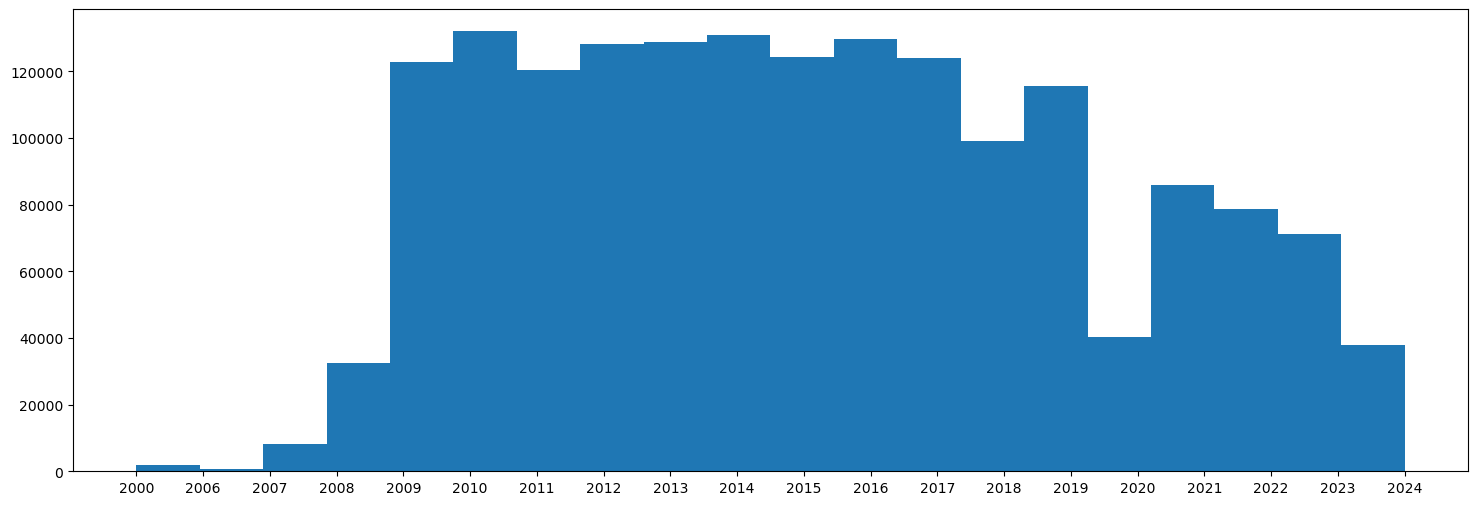

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
plt.hist(traffic['Yr'].sort_values(),bins=20)
plt.show()